In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [70]:
# Load the data
data = pd.read_csv("Resources/cleaned-property-sales-data_no-outliers2.csv")

# Print the columns to check for the correct column name
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30467 entries, 0 to 30466
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    30467 non-null  int64 
 1   Style         30467 non-null  object
 2   Bdrms         30467 non-null  int64 
 3   Baths_total   30467 non-null  int64 
 4   FinishedSqft  30467 non-null  int64 
 5   Sale_date     30467 non-null  object
 6   Year          30467 non-null  int64 
 7   Month         30467 non-null  int64 
 8   Sale_price    30467 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 2.1+ MB


In [71]:
data = data.rename(columns={'Bdrms':'Bedrooms', 'Baths_total': 'Bathrooms'})
data.head()

,Unnamed: 0,Style,Bedrooms,Bathrooms,FinishedSqft,Sale_date,Year,Month,Sale_price
0,79,Ranch,3,2,1884,2023-01-23,2023,1,349000
1,92,Ranch,3,2,2104,2022-09-13,2022,9,200000
2,144,Colonial,4,2,2200,2021-11-23,2021,11,336000
3,150,Ranch,3,2,1585,2023-11-21,2023,11,233000
4,179,Res O/S 1 Story,2,2,1125,2021-10-08,2021,10,250000


In [72]:
data.isnull().sum()

Unnamed: 0      0
Style           0
Bedrooms        0
Bathrooms       0
FinishedSqft    0
Sale_date       0
Year            0
Month           0
Sale_price      0
dtype: int64

In [73]:
reduced_features_df = data.rename(columns={'Bedrooms': 'bdrms', 'Bathrooms':'bathrooms_total','FinishedSqft':'finishedsqft', 'Year': 'sale_year'})
reduced_features_df

,Unnamed: 0,Style,bdrms,bathrooms_total,finishedsqft,Sale_date,sale_year,Month,Sale_price
0,79,Ranch,3,2,1884,2023-01-23,2023,1,349000
1,92,Ranch,3,2,2104,2022-09-13,2022,9,200000
2,144,Colonial,4,2,2200,2021-11-23,2021,11,336000
3,150,Ranch,3,2,1585,2023-11-21,2023,11,233000
4,179,Res O/S 1 Story,2,2,1125,2021-10-08,2021,10,250000
...,...,...,...,...,...,...,...,...,...
30462,55879,Rm or Rooming House,4,2,1522,2018-10-01,2018,10,115000
30463,55937,Rm or Rooming House,2,1,707,2018-11-01,2018,11,110000
30464,56000,Rm or Rooming House,2,2,1438,2018-12-01,2018,12,198000
30465,56001,Rm or Rooming House,4,2,2310,2018-12-01,2018,12,180000


In [74]:
y = reduced_features_df['Sale_price']
X = reduced_features_df[['finishedsqft', 'bdrms', 'bathrooms_total','sale_year']]
X.head()

,finishedsqft,bdrms,bathrooms_total,sale_year
0,1884,3,2,2023
1,2104,3,2,2022
2,2200,4,2,2021
3,1585,3,2,2023
4,1125,2,2,2021


In [75]:
y.head()

0    349000
1    200000
2    336000
3    233000
4    250000
Name: Sale_price, dtype: int64

<!-- data["bathrooms_total"] = 
reduced_features_df = data[[]] -->

In [76]:
# spliting data into training and testing 80/20 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Linear Regression


In [77]:
# setting the model to linear regression 
model = LinearRegression()
# fitting the model 
model.fit(X_train, y_train)

LinearRegression()

In [78]:
coef = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coef

,Coefficient
finishedsqft,52.796027
bdrms,-12857.908322
bathrooms_total,25156.481931
sale_year,7858.353653


In [79]:
# Prediction with test data 
y_pred = model.predict(X_test)
# getting mean square 
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3575893805.0246844


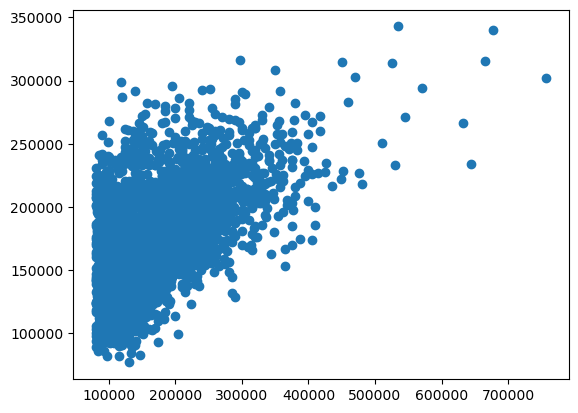

In [80]:
plt.scatter(y_test, y_pred)

In [81]:
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,167554.399414
1,148066.871046
2,144318.353148
3,185137.495355
4,134240.106543
...,...
3042,207893.833881
3043,139052.799308
3044,182612.791405
3045,105915.863008


In [82]:
y_test

12129    177500
26789    155700
28182    170000
24111    261000
5623     128000
          ...  
2904     147500
29179    230000
6204     170000
8238     153000
11746    123500
Name: Sale_price, Length: 3047, dtype: int64

In [83]:
# determining accuracy score 
model.score(X_test, y_test)

0.309620869461094

## Random Forest Regressor

In [84]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [85]:
y_pred = model.predict(X_test)
# getting mean square 
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4399601788.869769


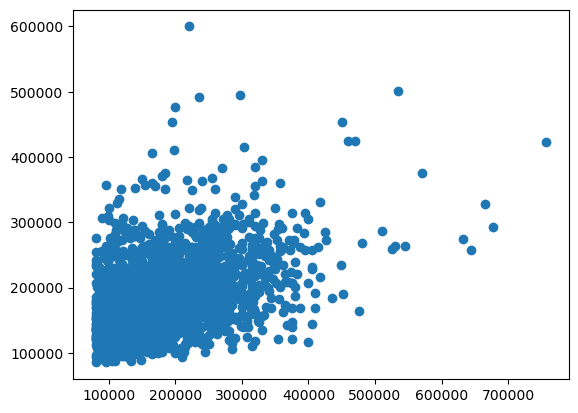

In [86]:
plt.scatter(y_test, y_pred)

In [87]:
model.score(X_test, y_test)

0.1505918734361409

House Price Prediction Using Elle's Model and the Previous (Unfiltered) Dataset

In [88]:
listings_data_df = pd.read_csv("Resources/original_extracted_df_MilwaukeeOnly.csv")
listings_data_df.head()

,State,City,Street,Zipcode,Latitude,Longitude,Bedroom,Bathroom,Area,PPSq,LotArea,ConvertedLot,LotUnit,MarketEstimate,RentEstimate,Price
0,WI,Milwaukee,North 26th STREET,53206,43.076214,-87.946370,4,2,NaN,NaN,3920.40,0.09,sqft,NaN,1425.0,7000
1,WI,Milwaukee,North 37th STREET,53210,43.066345,-87.959490,4,2,1714.0,20.361727,3484.80,0.08,sqft,NaN,1345.0,34900
2,WI,Milwaukee,North Sherman BOULEVARD UNIT 4326,53216,43.095818,-87.966620,4,2,1500.0,83.266667,0.62,0.62,acres,NaN,NaN,124900
3,WI,Milwaukee,North 25th STREET,53205,43.056957,-87.944756,3,2,1184.0,114.020270,4356.00,0.10,sqft,132800.0,1500.0,135000
4,WI,Milwaukee,North 86th PLACE,53225,43.121850,-88.019295,3,2,1271.0,106.215578,7840.80,0.18,sqft,136300.0,1875.0,135000


In [89]:
listings_data_df = listings_data_df.drop(columns=['PPSq', 'ConvertedLot','LotUnit','RentEstimate'], axis=1)
listings_data_df = listings_data_df[['Street', 'City', 'State', 'Zipcode', 'Latitude', 'Longitude', 'Bedroom', 'Bathroom', 'Area','LotArea', 'Price','MarketEstimate']]
listings_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Street          33 non-null     object 
 1   City            33 non-null     object 
 2   State           33 non-null     object 
 3   Zipcode         33 non-null     int64  
 4   Latitude        33 non-null     float64
 5   Longitude       33 non-null     float64
 6   Bedroom         33 non-null     int64  
 7   Bathroom        33 non-null     int64  
 8   Area            32 non-null     float64
 9   LotArea         28 non-null     float64
 10  Price           33 non-null     int64  
 11  MarketEstimate  26 non-null     float64
dtypes: float64(5), int64(4), object(3)
memory usage: 3.2+ KB


In [90]:
X_test.head()

,finishedsqft,bdrms,bathrooms_total,sale_year
12129,1567,3,2,2016
26789,1079,3,1,2020
28182,1008,3,1,2020
24111,1727,4,1,2022
5623,936,3,2,2016


In [91]:
listings_data_df = listings_data_df.rename(columns={'Bedroom': 'bdrms', 'Bathroom':'bathrooms_total','Area':'finishedsqft', 'LotArea': 'Lotsize'})
listings_data_df.head()

,Street,City,State,Zipcode,Latitude,Longitude,bdrms,bathrooms_total,finishedsqft,Lotsize,Price,MarketEstimate
0,North 26th STREET,Milwaukee,WI,53206,43.076214,-87.946370,4,2,NaN,3920.40,7000,NaN
1,North 37th STREET,Milwaukee,WI,53210,43.066345,-87.959490,4,2,1714.0,3484.80,34900,NaN
2,North Sherman BOULEVARD UNIT 4326,Milwaukee,WI,53216,43.095818,-87.966620,4,2,1500.0,0.62,124900,NaN
3,North 25th STREET,Milwaukee,WI,53205,43.056957,-87.944756,3,2,1184.0,4356.00,135000,132800.0
4,North 86th PLACE,Milwaukee,WI,53225,43.121850,-88.019295,3,2,1271.0,7840.80,135000,136300.0


In [92]:
listings_data_df.isnull().sum()

Street             0
City               0
State              0
Zipcode            0
Latitude           0
Longitude          0
bdrms              0
bathrooms_total    0
finishedsqft       1
Lotsize            5
Price              0
MarketEstimate     7
dtype: int64

In [93]:
listings_data_df=listings_data_df.dropna(subset=['finishedsqft','Lotsize'])
listings_data_df.isnull().sum()

Street             0
City               0
State              0
Zipcode            0
Latitude           0
Longitude          0
bdrms              0
bathrooms_total    0
finishedsqft       0
Lotsize            0
Price              0
MarketEstimate     4
dtype: int64

In [94]:
prediction1_df = listings_data_df.copy()
prediction1_df['sale_year'] = 2024
prediction1_df.head()

,Street,City,State,Zipcode,Latitude,Longitude,bdrms,bathrooms_total,finishedsqft,Lotsize,Price,MarketEstimate,sale_year
1,North 37th STREET,Milwaukee,WI,53210,43.066345,-87.959490,4,2,1714.0,3484.80,34900,NaN,2024
2,North Sherman BOULEVARD UNIT 4326,Milwaukee,WI,53216,43.095818,-87.966620,4,2,1500.0,0.62,124900,NaN,2024
3,North 25th STREET,Milwaukee,WI,53205,43.056957,-87.944756,3,2,1184.0,4356.00,135000,132800.0,2024
4,North 86th PLACE,Milwaukee,WI,53225,43.121850,-88.019295,3,2,1271.0,7840.80,135000,136300.0,2024
5,North 35th STREET,Milwaukee,WI,53216,43.095448,-87.957344,2,1,667.0,4356.00,137500,139700.0,2024


In [95]:
X_pred1 = prediction1_df[['finishedsqft', 'bdrms', 'bathrooms_total','sale_year']]
y_predicted_sales1 = model.predict(X_pred1)
listings_data_df['2024 Forecasted House Price'] = y_predicted_sales1
listings_data_df['Price Difference'] = listings_data_df['Price'] - listings_data_df['2024 Forecasted House Price']
listings_data_df['Market Estimate Difference'] = listings_data_df['MarketEstimate'] - listings_data_df['2024 Forecasted House Price']
listings_data_df

,Street,City,State,Zipcode,Latitude,Longitude,bdrms,bathrooms_total,finishedsqft,Lotsize,Price,MarketEstimate,2024 Forecasted House Price,Price Difference,Market Estimate Difference
1,North 37th STREET,Milwaukee,WI,53210,43.066345,-87.959490,4,2,1714.0,3484.80,34900,NaN,183646.833333,-148746.833333,NaN
2,North Sherman BOULEVARD UNIT 4326,Milwaukee,WI,53216,43.095818,-87.966620,4,2,1500.0,0.62,124900,NaN,280137.500000,-155237.500000,NaN
3,North 25th STREET,Milwaukee,WI,53205,43.056957,-87.944756,3,2,1184.0,4356.00,135000,132800.0,200714.184524,-65714.184524,-67914.184524
4,North 86th PLACE,Milwaukee,WI,53225,43.121850,-88.019295,3,2,1271.0,7840.80,135000,136300.0,232107.583333,-97107.583333,-95807.583333
5,North 35th STREET,Milwaukee,WI,53216,43.095448,-87.957344,2,1,667.0,4356.00,137500,139700.0,138603.413198,-1103.413198,1096.586802
6,North 17th STREET NORTH North,Milwaukee,WI,53206,43.069004,-87.934100,3,2,902.0,0.00,140000,NaN,199357.820000,-59357.820000,NaN
7,West Eden PLACE,Milwaukee,WI,53220,42.980330,-88.002720,3,1,1156.0,7840.80,144900,157300.0,169263.916667,-24363.916667,-11963.916667
8,South 8th STREET,Milwaukee,WI,53215,42.996044,-87.921000,3,1,1400.0,3484.80,155000,156700.0,175973.333333,-20973.333333,-19273.333333
10,North Sherman BOULEVARD,Milwaukee,WI,53216,43.077385,-87.966930,4,2,1972.0,0.96,163500,162900.0,305683.333333,-142183.333333,-142783.333333
11,North 78th STREET,Milwaukee,WI,53222,43.074600,-88.009514,2,1,953.0,4791.60,179000,192900.0,163703.500000,15296.500000,29196.500000
